In [1]:
from pyckmeans import MultiCKMeans
import sklearn.datasets
import math
import pandas as pd
# import tensorflow as tf
# # import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
# import keras
# from tensorflow.keras import Model
# from tensorflow.keras import Sequential
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
np.random.seed(0)
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# # https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
# from tensorflow.keras import initializers
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from scipy.stats import multivariate_normal
# from keras.optimizers import Adam, SGD, Adadelta


In [2]:
x_train_scaled = pd.read_csv('../data/260_sample_train_scaled.csv').set_index("Patient_ID")
x_train_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.932722,0.806913,0.653998,0.860533,0.837016,1.0,0.550415,0.000000,0.778617,0.940755
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.000000,0.692339,0.578107,0.619998,0.0,0.000000,0.000000,0.607899,0.206271
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.000000,0.505180,0.644769,0.603195,0.756754,0.0,0.350566,0.000000,0.899508,0.014040
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.000000,0.000000,0.131632,0.053179,0.774455,0.0,0.000000,0.000000,0.528882,0.305806
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.000000,0.000000,0.085440,0.761822,0.860355,0.0,0.000000,0.000000,0.604102,0.014040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.000000,0.000000,0.149005,0.740343,0.641698,0.0,0.000000,0.694951,0.485461,0.300471
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.000000,0.000000,0.229358,0.640000,0.731908,0.0,0.422815,0.096205,0.502320,0.615334
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.000000,0.000000,0.211405,0.797333,0.896369,0.0,0.234352,0.000000,0.496177,0.402714


In [3]:
x_test_scaled = pd.read_csv('../data/260_sample_test_scaled.csv').set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.00000,0.0,0.016890,0.754178,0.816832,0.0,0.214180,0.000000,0.627881,0.014040
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.00000,0.0,0.380373,0.659297,0.789071,0.0,0.000000,0.296100,0.763348,0.354178
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.68115,0.0,0.127947,1.009412,0.582660,0.0,0.000000,0.473139,0.277717,0.014040
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.00000,0.0,0.203518,0.723574,0.696147,0.0,0.000000,0.000000,0.646765,0.450394
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.00000,0.0,0.214416,0.496175,0.803259,0.0,0.236722,0.000000,0.534480,0.304870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.00000,0.0,0.357494,0.782257,0.591442,0.0,0.000000,0.431213,0.465159,0.540147
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.00000,0.0,0.418615,0.949858,0.559052,0.0,0.269991,0.410777,0.361163,0.561191
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.00000,0.0,0.105689,0.683222,0.878635,0.0,0.182111,0.650452,0.568842,0.398252


In [4]:
full_ds = pd.concat([x_train_scaled, x_test_scaled])
full_ds

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.932722,0.806913,0.653998,0.860533,0.837016,1.0,0.550415,0.000000,0.778617,0.940755
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.000000,0.692339,0.578107,0.619998,0.0,0.000000,0.000000,0.607899,0.206271
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.000000,0.505180,0.644769,0.603195,0.756754,0.0,0.350566,0.000000,0.899508,0.014040
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.000000,0.000000,0.131632,0.053179,0.774455,0.0,0.000000,0.000000,0.528882,0.305806
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.000000,0.000000,0.085440,0.761822,0.860355,0.0,0.000000,0.000000,0.604102,0.014040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.000000,0.000000,0.357494,0.782257,0.591442,0.0,0.000000,0.431213,0.465159,0.540147
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.000000,0.000000,0.418615,0.949858,0.559052,0.0,0.269991,0.410777,0.361163,0.561191
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.000000,0.000000,0.105689,0.683222,0.878635,0.0,0.182111,0.650452,0.568842,0.398252


In [5]:
# gene_df_shap = pd.DataFrame(shap_values[2], index=x_test_scaled.index, columns = x_test_scaled.columns)
df_cd_deep = full_ds[full_ds.index.str.endswith('_CD_deep_ulcer')]
df_cd_plain = full_ds[full_ds.index.str.endswith('_CD_plain')]
df_control = full_ds[full_ds.index.str.endswith('_control')]
df_cd_deep

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
254_CD_deep_ulcer,0.688952,0.790972,0.730387,0.698611,0.814798,0.539765,0.476091,0.531103,0.643682,0.557025,...,0.000000,0.0,0.345557,0.977299,0.857707,0.0,0.000000,0.000000,0.981962,0.014040
216_CD_deep_ulcer,0.392511,0.306222,0.540222,0.462697,0.430877,0.751154,0.073092,0.495681,0.926051,0.333960,...,0.430252,0.0,0.151754,0.745600,0.806073,0.0,0.000000,0.100151,0.500584,0.014040
263_CD_deep_ulcer,0.269897,0.214387,0.187335,0.158953,0.180396,0.856687,0.000000,0.274659,0.916233,0.329184,...,0.143543,0.0,0.067179,0.700859,0.890089,0.0,0.000000,0.376466,0.571121,0.033752
95_CD_deep_ulcer,0.322076,0.317311,0.295913,0.189476,0.222371,0.635286,0.186784,0.809517,0.583656,0.224686,...,0.000000,0.0,0.486607,0.601964,0.860680,0.0,0.000000,0.221262,0.809683,0.014040
223_CD_deep_ulcer,0.697044,0.615143,0.670016,0.731387,0.602704,0.613085,0.000000,0.321284,0.676704,0.632284,...,0.000000,0.0,0.278193,0.636968,0.729221,0.0,0.213308,0.000000,0.444794,0.045012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145_CD_deep_ulcer,0.580654,0.316558,0.463705,0.469550,0.382367,0.548972,0.146997,0.372269,0.697253,0.267339,...,0.000000,0.0,0.321706,0.706920,0.773461,0.0,0.032108,0.000000,0.692775,0.534324
143_CD_deep_ulcer,0.524637,0.358230,0.463575,0.519032,0.484028,0.641028,0.171927,0.547367,0.820735,0.317961,...,0.000000,0.0,0.251423,0.519011,0.846744,0.0,0.000000,0.169754,0.751005,0.191430
165_CD_deep_ulcer,0.631350,0.589925,0.672493,0.684450,0.603240,0.642262,0.547043,0.142334,0.726706,0.604319,...,0.000000,0.0,0.142216,0.569163,0.889357,0.0,0.000000,0.034570,0.545153,0.014040


In [6]:
with open("../data/models/shap/all_indep_2p11", "rb") as fp:   # Unpickling
    shap_values = pickle.load(fp)

In [7]:
shap_values = shap_values[0]

In [8]:
gene_df_shap = pd.DataFrame(shap_values[2], index=x_test_scaled.index, columns = x_test_scaled.columns) # CD deep ulcer shap values
df_train_cd_deep_shap = gene_df_shap[gene_df_shap.index.str.endswith('_CD_deep_ulcer')]
df_train_cd_plain_shap = gene_df_shap[gene_df_shap.index.str.endswith('_CD_plain')]
df_train_control_shap = gene_df_shap[gene_df_shap.index.str.endswith('_control')]
df_train_cd_deep_shap.describe()

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.037757,0.001366,-0.097934,0.004901,0.027020,0.165064,0.018017,-0.077825,0.008641,-0.232965,...,0.044181,0.071564,-0.226322,-0.055122,-0.060903,-0.012402,-0.063825,-0.181030,0.052553,0.025996
std,0.371415,0.468742,0.506947,0.290281,0.194804,0.581284,0.333476,0.398156,0.389777,0.896139,...,0.332984,0.383130,0.613720,0.300543,0.278367,0.297086,0.386606,0.618670,0.445634,0.450620
min,-0.881731,-0.937997,-2.201827,-0.531609,-0.408463,-0.672365,-0.610180,-1.514947,-0.908141,-4.224106,...,-0.839397,-1.107473,-2.763234,-1.440793,-1.020407,-1.189300,-1.306046,-2.289270,-1.111437,-1.569890
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.078771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008860
max,1.398269,1.302928,0.563725,0.895373,0.659506,1.849498,1.347169,0.629202,1.479252,0.412765,...,1.248242,0.995732,0.377116,0.150046,0.336405,0.660652,0.721095,1.134502,1.026906,1.379640


# CD Deep Ulcer

# Pre-processing dataset

In [9]:
gene_shap_means = df_train_cd_deep_shap.describe().loc["mean"].values
gene_shap_means_abs = np.abs(gene_shap_means)


In [10]:
full_exp_df = full_ds.copy()
full_exp_df

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.932722,0.806913,0.653998,0.860533,0.837016,1.0,0.550415,0.000000,0.778617,0.940755
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.000000,0.692339,0.578107,0.619998,0.0,0.000000,0.000000,0.607899,0.206271
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.000000,0.505180,0.644769,0.603195,0.756754,0.0,0.350566,0.000000,0.899508,0.014040
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.000000,0.000000,0.131632,0.053179,0.774455,0.0,0.000000,0.000000,0.528882,0.305806
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.000000,0.000000,0.085440,0.761822,0.860355,0.0,0.000000,0.000000,0.604102,0.014040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.000000,0.000000,0.357494,0.782257,0.591442,0.0,0.000000,0.431213,0.465159,0.540147
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.000000,0.000000,0.418615,0.949858,0.559052,0.0,0.269991,0.410777,0.361163,0.561191
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.000000,0.000000,0.105689,0.683222,0.878635,0.0,0.182111,0.650452,0.568842,0.398252


In [11]:
full_exp_train_proc = full_exp_df.multiply(gene_shap_means_abs, axis='columns').T
full_exp_train_proc

Patient_ID,55_control,168_CD_plain,72_control,120_control,258_CD_plain,254_CD_deep_ulcer,9_CD_plain,111_CD_plain,57_CD_plain,216_CD_deep_ulcer,...,321_CD_plain,12_CD_plain,165_CD_deep_ulcer,286_CD_plain,89_control,107_CD_plain,279_CD_plain,179_CD_plain,70_CD_deep_ulcer,256_CD_deep_ulcer
AADAC,0.026536,0.028371,0.029696,0.026713,0.026469,0.026013,0.023673,0.022345,0.029321,0.014820,...,0.027303,0.031120,0.023838,0.034522,0.034546,0.027794,0.008330,0.027354,0.018437,0.023011
APOA1,0.001091,0.000824,0.001031,0.000905,0.000905,0.001080,0.000665,0.000925,0.001060,0.000418,...,0.000909,0.000983,0.000806,0.001258,0.001129,0.000899,0.000276,0.000992,0.000677,0.000818
APOA4,0.070479,0.060990,0.072432,0.063468,0.069260,0.071530,0.067192,0.061465,0.080087,0.052906,...,0.078426,0.072968,0.065860,0.094912,0.083782,0.075636,0.017903,0.075110,0.056303,0.066796
APOB,0.003576,0.003077,0.003706,0.003748,0.004090,0.003424,0.002785,0.002689,0.003375,0.002268,...,0.003540,0.004089,0.003355,0.004551,0.004528,0.003360,0.000555,0.003805,0.002408,0.003753
APOC3,0.021480,0.016398,0.022153,0.017679,0.018108,0.022016,0.017193,0.018117,0.024151,0.011642,...,0.020439,0.019784,0.016300,0.026482,0.021557,0.017800,0.002857,0.018653,0.014593,0.017519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C16orf78,0.012402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C5orf17,0.035130,0.000000,0.022375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017232,0.011623,0.017615,0.000000
LOC100132831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130147,0.000000,0.000000,0.018130,...,0.109811,0.022865,0.006258,0.191758,0.151348,0.078062,0.074363,0.117751,0.161597,0.049902
LOC100288778,0.040919,0.031947,0.047272,0.027794,0.031748,0.051605,0.028494,0.049534,0.048052,0.026307,...,0.018641,0.021747,0.028650,0.042047,0.031633,0.024446,0.018980,0.029895,0.038344,0.025883


In [12]:
# process only for CD deep ulcer
df_cd_deep_proc = df_cd_deep.multiply(gene_shap_means_abs, axis='columns').T
df_cd_deep_proc

Patient_ID,254_CD_deep_ulcer,216_CD_deep_ulcer,263_CD_deep_ulcer,95_CD_deep_ulcer,223_CD_deep_ulcer,99_CD_deep_ulcer,296_CD_deep_ulcer,219_CD_deep_ulcer,138_CD_deep_ulcer,146_CD_deep_ulcer,...,212_CD_deep_ulcer,230_CD_deep_ulcer,259_CD_deep_ulcer,59_CD_deep_ulcer,98_CD_deep_ulcer,145_CD_deep_ulcer,143_CD_deep_ulcer,165_CD_deep_ulcer,70_CD_deep_ulcer,256_CD_deep_ulcer
AADAC,0.026013,0.014820,0.010190,0.012161,0.026318,0.008482,0.018664,0.032300,0.023778,0.021785,...,0.032456,0.019363,0.012512,0.032604,0.010682,0.021924,0.019809,0.023838,0.018437,0.023011
APOA1,0.001080,0.000418,0.000293,0.000433,0.000840,0.000218,0.000610,0.000959,0.000888,0.000520,...,0.001030,0.000327,0.000556,0.001113,0.000417,0.000432,0.000489,0.000806,0.000677,0.000818
APOA4,0.071530,0.052906,0.018346,0.028980,0.065617,0.014896,0.050115,0.073504,0.078278,0.049425,...,0.079593,0.032075,0.043394,0.081810,0.032875,0.045412,0.045400,0.065860,0.056303,0.066796
APOB,0.003424,0.002268,0.000779,0.000929,0.003585,0.000554,0.002528,0.004032,0.003302,0.002285,...,0.004247,0.002266,0.001844,0.004508,0.001102,0.002301,0.002544,0.003355,0.002408,0.003753
APOC3,0.022016,0.011642,0.004874,0.006009,0.016285,0.004524,0.013073,0.019707,0.020306,0.011169,...,0.021534,0.006749,0.011069,0.020610,0.009573,0.010332,0.013079,0.016300,0.014593,0.017519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C16orf78,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C5orf17,0.000000,0.000000,0.000000,0.000000,0.013614,0.000000,0.000000,0.035839,0.000000,0.000000,...,0.000000,0.030555,0.004476,0.005659,0.001525,0.002049,0.000000,0.000000,0.017615,0.000000
LOC100132831,0.000000,0.018130,0.068152,0.040055,0.000000,0.115828,0.000000,0.046312,0.110947,0.091252,...,0.000000,0.147479,0.000000,0.086803,0.113318,0.000000,0.030730,0.006258,0.161597,0.049902
LOC100288778,0.051605,0.026307,0.030014,0.042552,0.023375,0.024075,0.024163,0.028202,0.033233,0.040199,...,0.033625,0.030576,0.027190,0.024429,0.028420,0.036408,0.039468,0.028650,0.038344,0.025883


## Consensus KMeans clustering

In [13]:



# simulate dataset
# 50 samples, 10 features, 3 true clusters
# x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=10, centers=3, random_state=44)

# apply multiple Consensus K-Means for
# k = 2, ..., 5
# 100 K-Means runs per Consensus K-Means
# draw 80% of the sample for each single K-Means
# draw 50% of the features for each single K-Means
mckm = MultiCKMeans(k=[2, 3, 4, 5, 6, 7, 8, 9], n_rep=100, p_samp=0.8, p_feat=0.5)
mckm.fit(full_exp_train_proc.values)
mckm_res_train = mckm.predict(full_exp_train_proc.values)
# mckm_res_test = mckm.predict(gene_exp_test_proc.values)



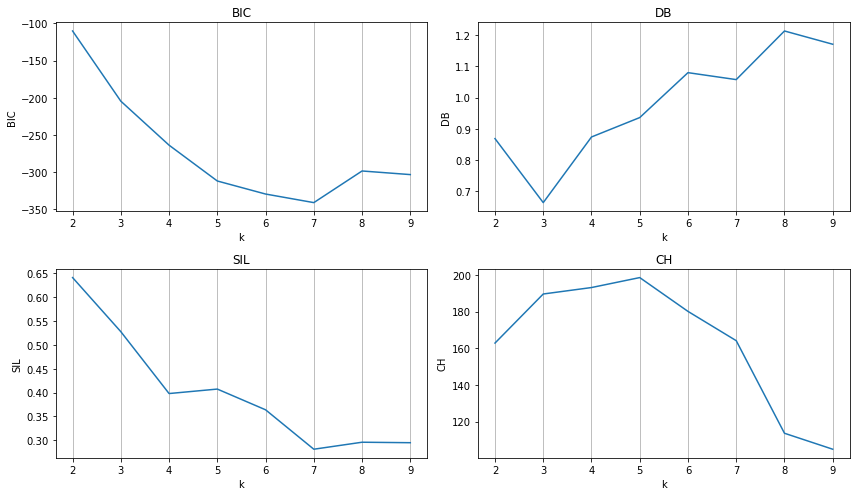

In [14]:
pl = mckm_res_train.plot_metrics(figsize=(12, 7))

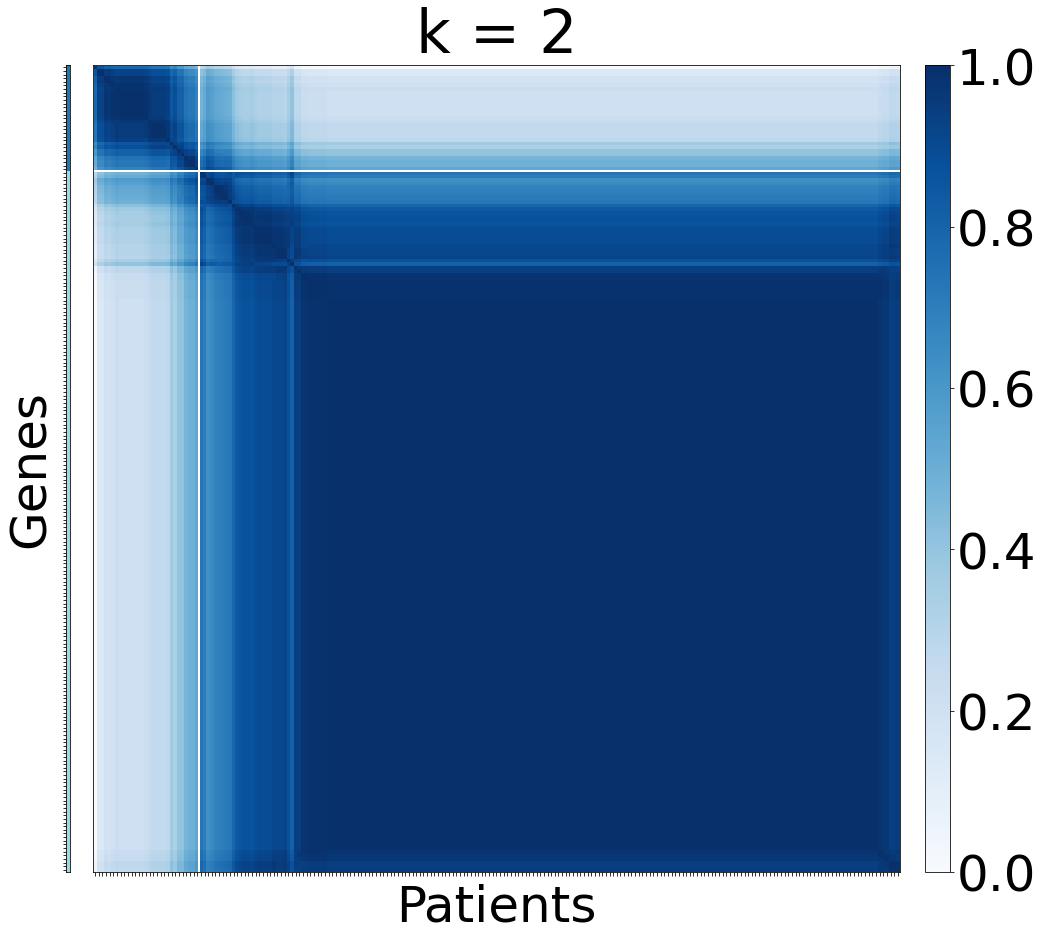

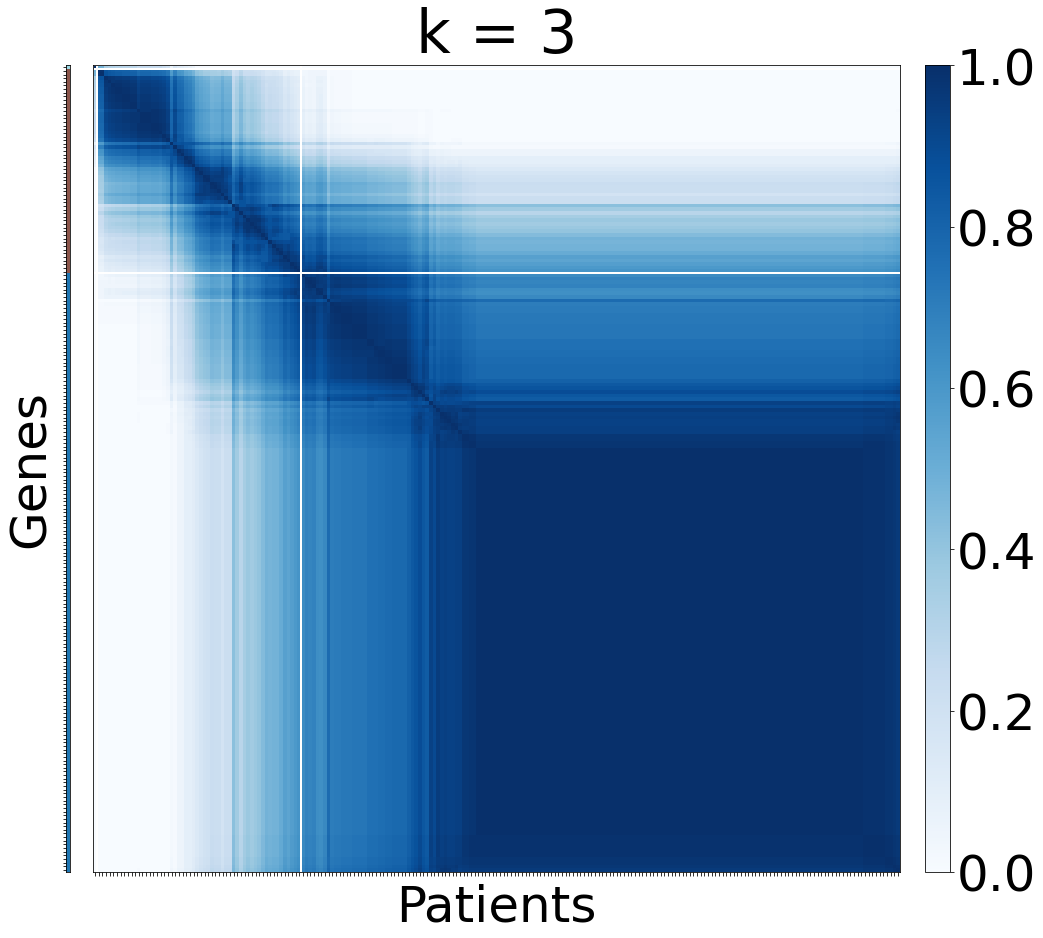

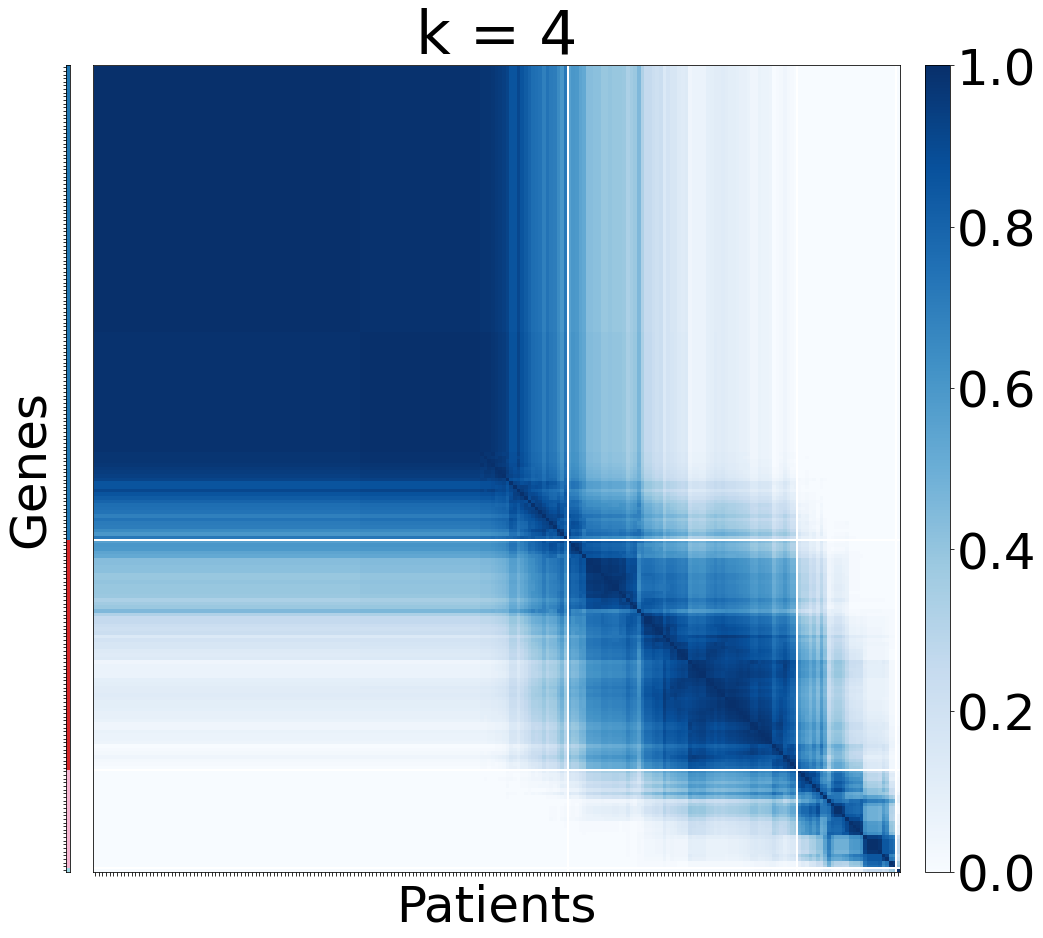

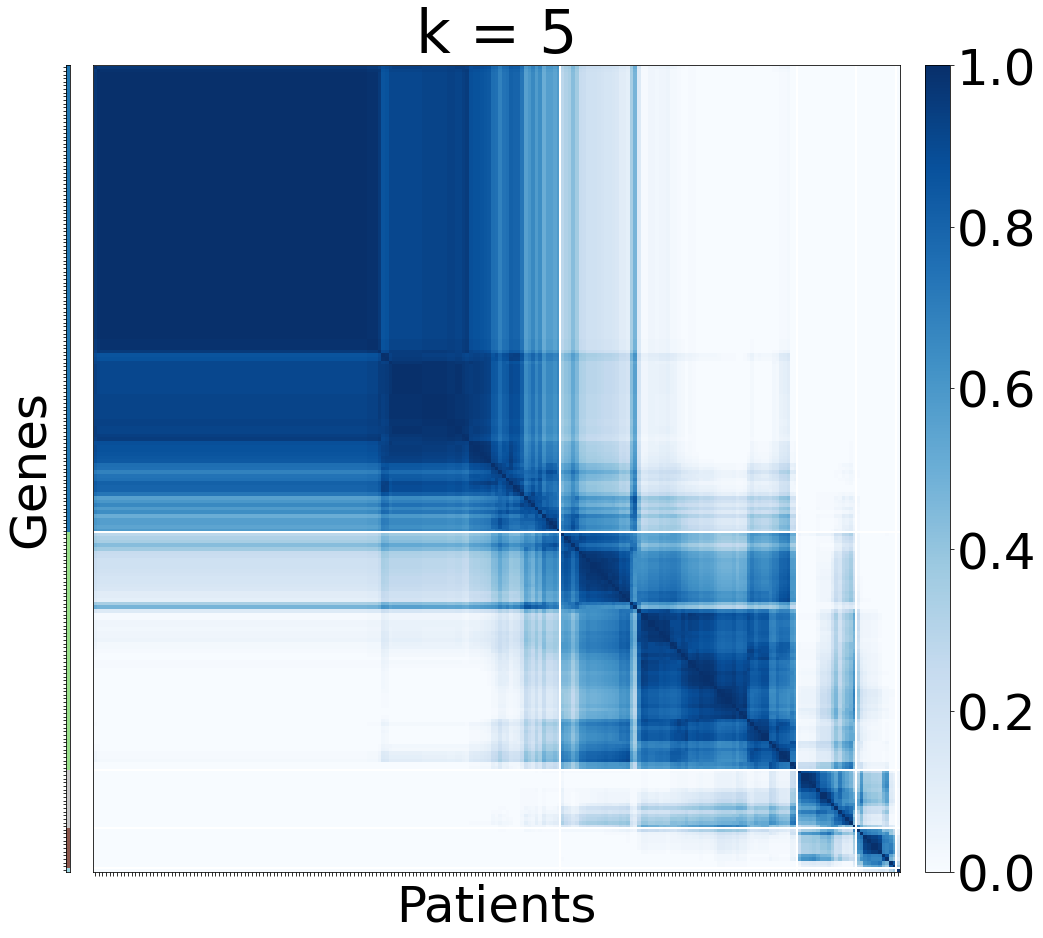

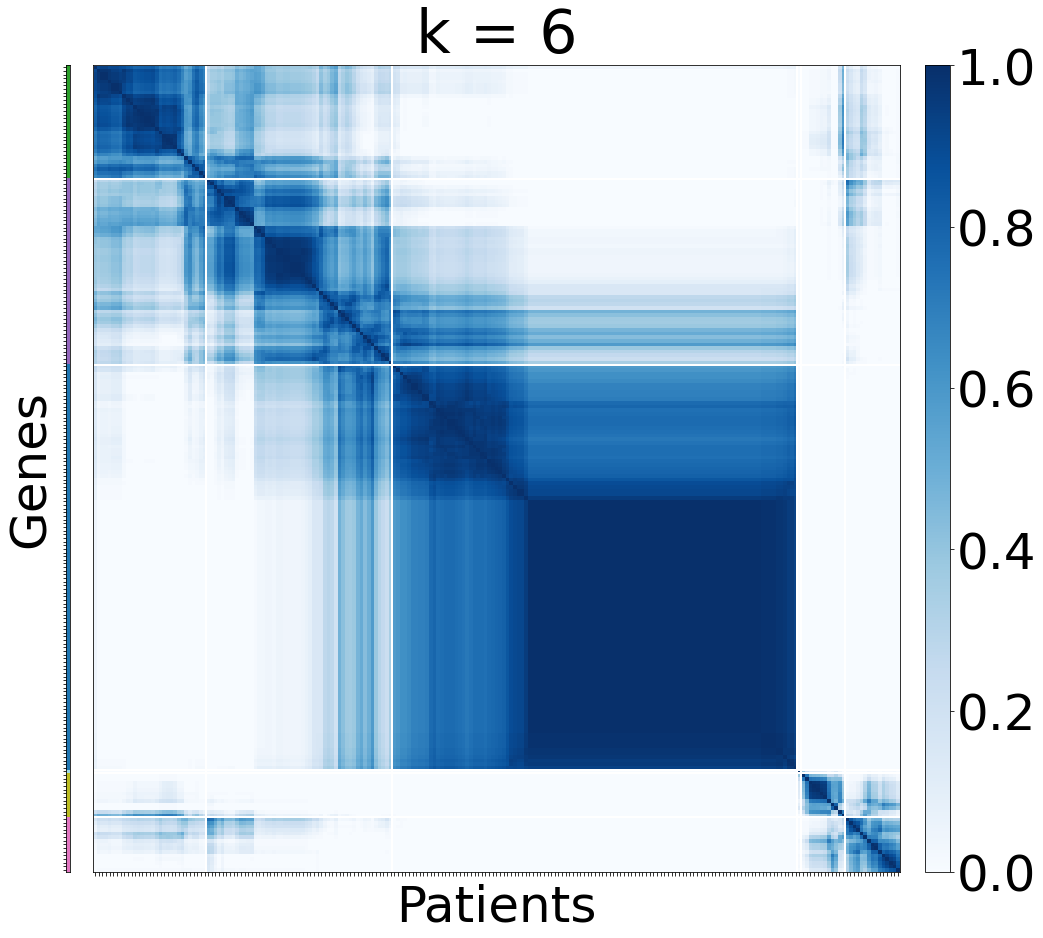

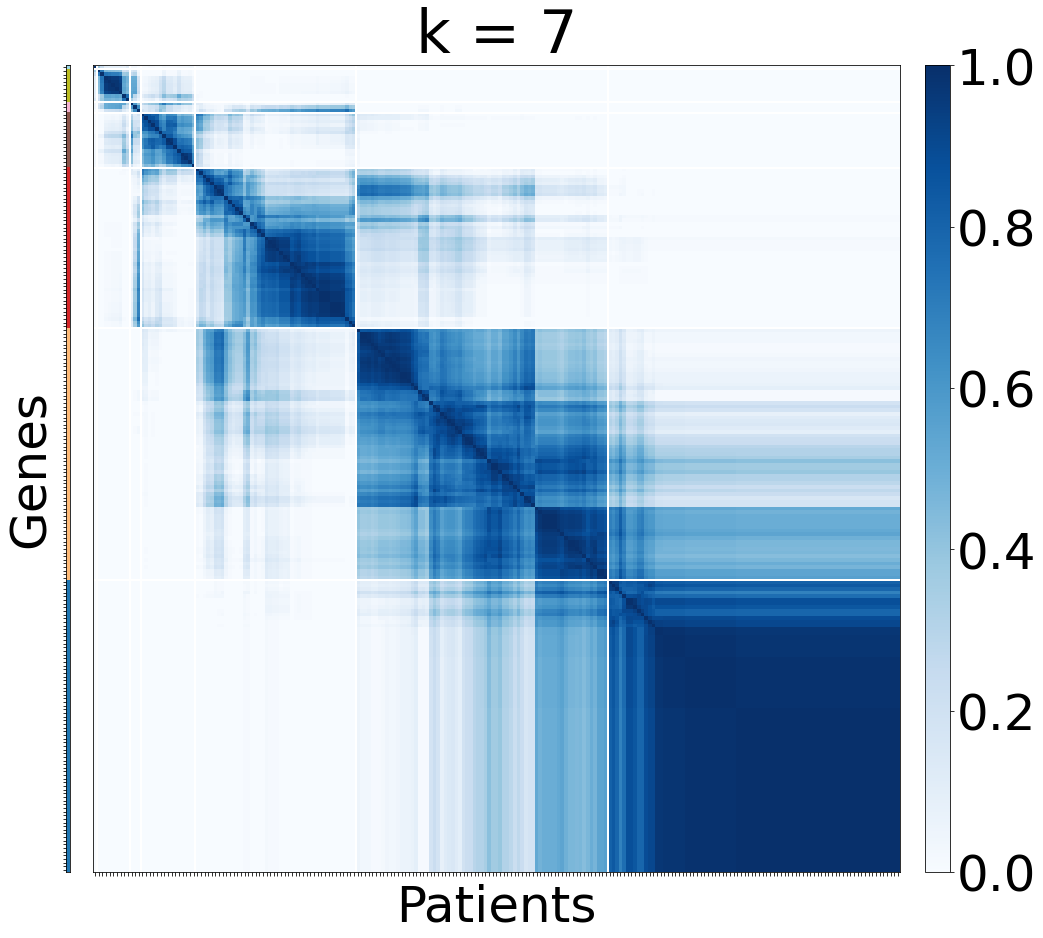

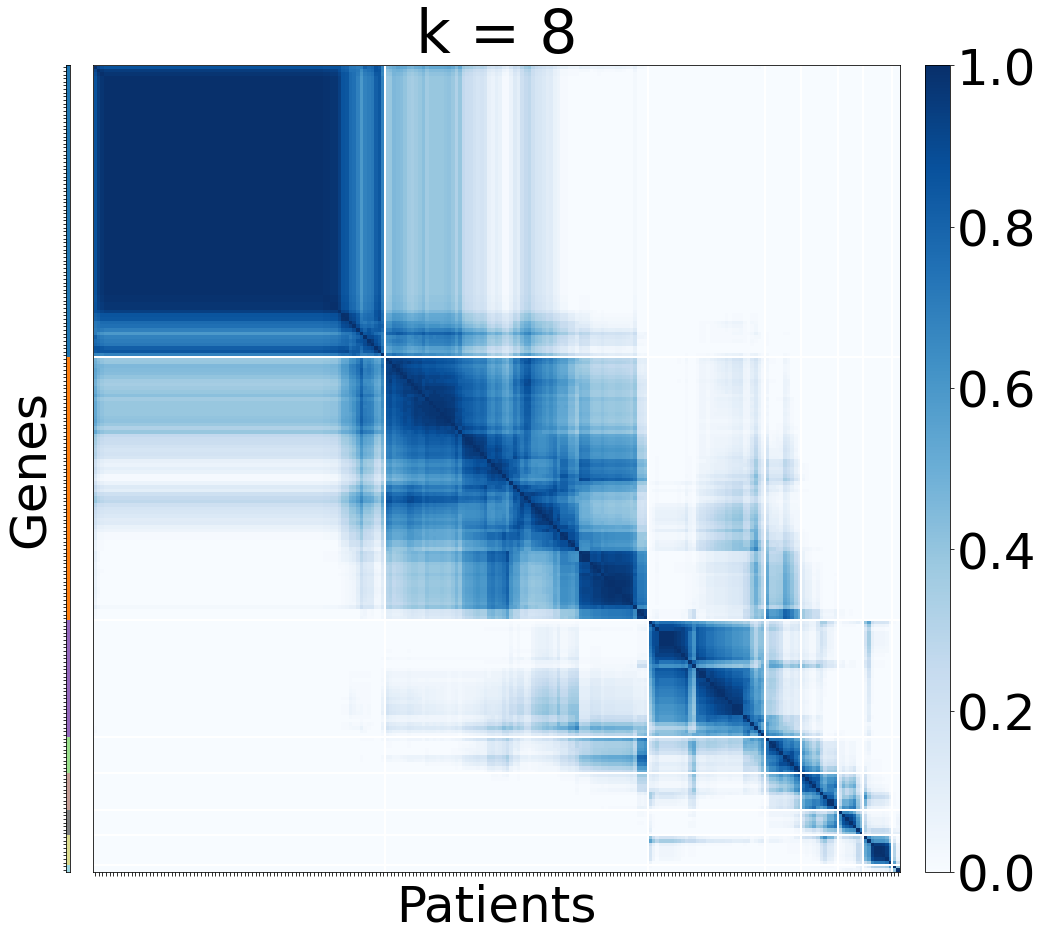

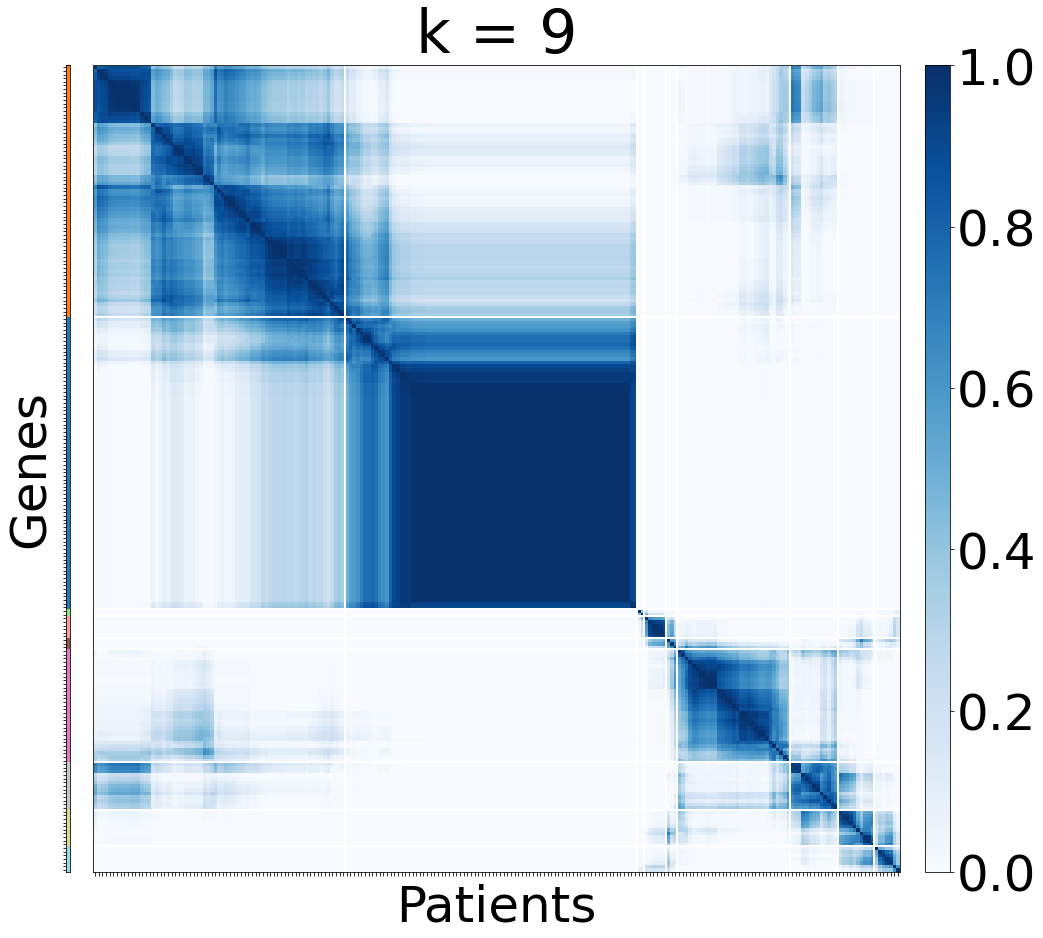

In [15]:
plt.rcParams.update({'font.size': 50})

# Select a 'good' K
# At k values around 7, BIC, DB, and SIL have a (local) optimum
# ckm_res_k7 = mckm_res_train.ckmeans_results[1]
# fig = ckm_res_k7.plot(figsize=(14,14))

for i, ckm_res in enumerate(mckm_res_train.ckmeans_results):
    fig = ckm_res.plot(figsize=(14,14))
#     print("k =", i+2)
    fig.axes[0].set_xticklabels('')
    fig.axes[1].set_yticklabels('')
    fig.axes[0].set_xlabel("Patients")
    fig.axes[1].set_ylabel("Genes")
    fig.axes[0].set_title("k = "+ str(i+2))
    plt.show()

In [16]:
# clustering metrics and plots for all k
print('Metrics:')
print(mckm_res_train.metrics)


Metrics:
   k       sil         bic        db          ch
0  2  0.641015 -110.083079  0.868786  162.789674
1  3  0.527620 -204.526756  0.664128  189.544515
2  4  0.397945 -263.740991  0.873981  193.061863
3  5  0.407317 -311.928993  0.936060  198.494720
4  6  0.363888 -329.476260  1.079667  180.058012
5  7  0.281257 -341.023376  1.057471  164.094758
6  8  0.295911 -298.457138  1.212924  113.613859
7  9  0.294909 -303.322128  1.170523  104.908427


In [17]:
# best k:
k = 4
ckm_res = mckm_res_train.ckmeans_results[k-2]

cd_deep_clusters = ckm_res.cl
print('Cluster Membership:', cd_deep_clusters)
cd_deep_clusters.shape

Cluster Membership: [0 0 1 0 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 2 0 1 2 1 2
 2 2 1 0 0 0 1 0 2 0 1 1 2 0 0 0 2 2 0 0 1 0 0 0 2 1 0 0 0 0 0 0 0 1 1 0 0
 1 0 2 0 2 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 2 1 1 1 0 0 0 0 1 0 1 0 1 2
 1 0 1 1 0 1 0 0 0 0 0 0 1 2 1 0 2 1 0 2 1 0 1 0 0 0 0 2 1 0 1 2 0 0 0 0 0
 0 1 1 1 2 0 2 0 1 1 0 0 0 1 1 0 0 1 2 1 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 3 2 1 1 0 1 0 0 0 1 1 2 1 2 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0]


(221,)

## Only CD deep ulcer patients (?)

In [18]:
# mckm = MultiCKMeans(k=[2, 3, 4, 5,6,7,8,9], n_rep=100, p_samp=0.8, p_feat=0.5)
# mckm.fit(df_cd_deep_proc.values)
# mckm_res_train = mckm.predict(df_cd_deep_proc.values)


# mckm_res_test = mckm.predict(gene_exp_test_proc.values)



In [19]:
# df_cd_deep_proc

In [20]:
# mckm_res_train.plot_metrics(figsize=(12, 7))

# for i, ckm_res in enumerate(mckm_res_train.ckmeans_results):
    
#     fig = ckm_res.plot(figsize=(14,14))
#     print("k =", i+2)
#     fig.axes[0].set_xticklabels('')
#     fig.axes[1].set_yticklabels('')
#     fig.axes[0].set_xlabel("Patients")
#     fig.axes[1].set_ylabel("Genes")
#     plt.show()

## Aggregate bar plot, showing potential gene modules alongside SHAP contributions for CD deep ulcer patients

In [21]:
cd_deep_clusters

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0,
       2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0], dtype=int32)

In [22]:
shap_df = df_train_cd_deep_shap.describe().T
shap_df["cluster_num"] = cd_deep_clusters
shap_df["gene_symbol"] = shap_df.index
shap_df

,count,mean,std,min,25%,50%,75%,max,cluster_num,gene_symbol
AADAC,24.0,0.037757,0.371415,-0.881731,0.0,0.0,0.00000,1.398269,0,AADAC
APOA1,24.0,0.001366,0.468742,-0.937997,0.0,0.0,0.00000,1.302928,0,APOA1
APOA4,24.0,-0.097934,0.506947,-2.201827,0.0,0.0,0.00000,0.563725,1,APOA4
APOB,24.0,0.004901,0.290281,-0.531609,0.0,0.0,0.00000,0.895373,0,APOB
APOC3,24.0,0.027020,0.194804,-0.408463,0.0,0.0,0.00000,0.659506,0,APOC3
...,...,...,...,...,...,...,...,...,...,...
C16orf78,24.0,-0.012402,0.297086,-1.189300,0.0,0.0,0.00000,0.660652,0,C16orf78
C5orf17,24.0,-0.063825,0.386606,-1.306046,0.0,0.0,0.00000,0.721095,0,C5orf17
LOC100132831,24.0,-0.181030,0.618670,-2.289270,0.0,0.0,0.00000,1.134502,0,LOC100132831
LOC100288778,24.0,0.052553,0.445634,-1.111437,0.0,0.0,0.00000,1.026906,0,LOC100288778


In [23]:
shap_df["cluster_num"].values

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0,
       2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0], dtype=int32)

In [24]:
shap_df.loc["SRSF4"]

count                 24
mean            0.782131
std              3.55272
min            -0.287119
25%                    0
50%                    0
75%            0.0757288
max              17.4387
cluster_num            3
gene_symbol        SRSF4
Name: SRSF4, dtype: object

In [25]:
mean_df = shap_df[['mean','cluster_num','gene_symbol']]
mean_df

,mean,cluster_num,gene_symbol
AADAC,0.037757,0,AADAC
APOA1,0.001366,0,APOA1
APOA4,-0.097934,1,APOA4
APOB,0.004901,0,APOB
APOC3,0.027020,0,APOC3
...,...,...,...
C16orf78,-0.012402,0,C16orf78
C5orf17,-0.063825,0,C5orf17
LOC100132831,-0.181030,0,LOC100132831
LOC100288778,0.052553,0,LOC100288778


In [26]:
mean_df.loc["SRSF4"]

mean           0.782131
cluster_num           3
gene_symbol       SRSF4
Name: SRSF4, dtype: object

In [27]:
def group_fn(data):
    d = {}
    mean_vals = data['mean']
    symbols = list(data['gene_symbol'])
#     print(mean_vals)
#     print(symbols)
    mean_dict = {symbols[i]: abs(mean_vals[i]) for i in range(len(symbols))}
#     print(mean_dict)
    gene_dict = dict(sorted(mean_dict.items(), key=lambda x : x[1], reverse=True))
    gene_list = list(gene_dict.keys())
#     print(gene_list)
    d['sum'] = np.sum(data['mean'])
    d['gene_count'] = data['mean'].count()
    d['grouped_genes'] = gene_list
    return pd.Series(d)

def group_labels(x):
    if len(x) > 4:
        gene_list = x[:4]
    else:
        gene_list = x
    return ", ".join(gene_list)

def add_other(num, curr_label, max_display=4):
#     print(type(num))
#     print(type(curr_label))
    if num > 1:
        if num > 2: 
            other = " others" 
            num_displayed = min(num, max_display)
        else:
            num_displayed = 2
            other = " other"
        rem = num - num_displayed
        if rem == 0:
            return curr_label
        return curr_label + " + " + str(rem) + other
    else:
        return curr_label

In [28]:
agg_df = mean_df.groupby(['cluster_num'])
agg_df = agg_df.apply(group_fn)
agg_df

,sum,gene_count,grouped_genes
cluster_num,,,
0,-0.258988,130,"[CLVS1, LOC100132831, LOC147646, LOC286114, LO..."
1,-0.889261,63,"[TIMM50, TM4SF19, LSM5, NCRUPAR, PUM2, S100A9,..."
2,2.078248,27,"[LOC392364, C19orf59, MEP1B, TAS2R5, HSD11B1, ..."
3,0.782131,1,[SRSF4]


In [29]:
agg_df["cluster_labels"] = agg_df["grouped_genes"].apply(group_labels)
# agg_df["cluster_labels"] = agg_df["count"].apply(add_other)

agg_df['cluster_labels'] = agg_df.apply(lambda x: add_other(x["gene_count"], x["cluster_labels"]), axis=1)
agg_df

,sum,gene_count,grouped_genes,cluster_labels
cluster_num,,,,
0,-0.258988,130,"[CLVS1, LOC100132831, LOC147646, LOC286114, LO...","CLVS1, LOC100132831, LOC147646, LOC286114 + 12..."
1,-0.889261,63,"[TIMM50, TM4SF19, LSM5, NCRUPAR, PUM2, S100A9,...","TIMM50, TM4SF19, LSM5, NCRUPAR + 59 others"
2,2.078248,27,"[LOC392364, C19orf59, MEP1B, TAS2R5, HSD11B1, ...","LOC392364, C19orf59, MEP1B, TAS2R5 + 23 others"
3,0.782131,1,[SRSF4],SRSF4


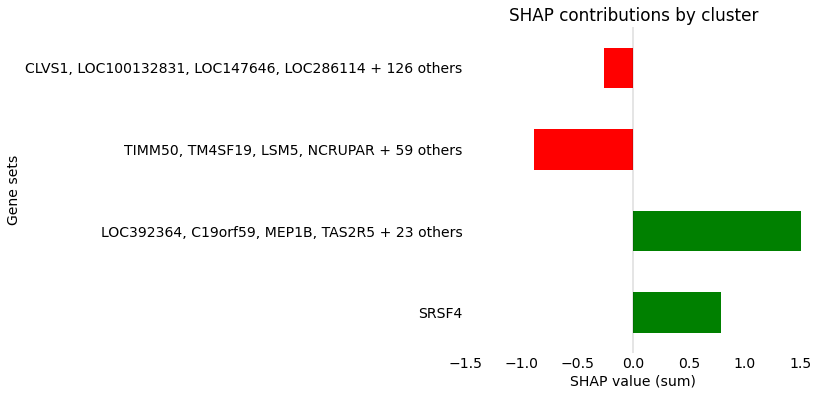

In [30]:
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (6,6)
agg_df.plot.barh(x="cluster_labels", y="sum", legend=None, zorder=2, color=(agg_df['sum'] > 0).map({True: 'g',False: 'r'}))

plt.title('SHAP contributions by cluster')
plt.ylabel('Gene sets')
plt.xlabel('SHAP value (sum)')
plt.xlim((-1.5, 1.5))
for i, v in enumerate(agg_df["sum"]):
    v = np.round(v, 3)
    vt = "+{:.3f}".format(v) if v >= 0 else "{:.3f}".format(v)
    offset = -.13 if v < 0 else .02
    colour = 'darkred' if v < 0 else 'darkgreen'
#     plt.text(v + offset, i + .08, vt, color=colour, zorder=3)
#     plt.axhline(i,linewidth=.07, color='k', zorder=1, linestyle='--')
    

fig.set_dpi(100)
plt.axvline(0,linewidth=.2, color='k')
size = fig.get_size_inches()[1]
plt.axhline(6.4,linewidth=.9, color='darkgrey')

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.gca().invert_yaxis()
plt.box(on=False)

plt.show()

In [31]:
agg_df["grouped_genes"]

cluster_num
0    [CLVS1, LOC100132831, LOC147646, LOC286114, LO...
1    [TIMM50, TM4SF19, LSM5, NCRUPAR, PUM2, S100A9,...
2    [LOC392364, C19orf59, MEP1B, TAS2R5, HSD11B1, ...
3                                              [SRSF4]
Name: grouped_genes, dtype: object

In [32]:
for li in agg_df["grouped_genes"]:
    print(len(li),"genes:")
    for item in li:
        print(item)
    print("----------------------")

130 genes:
CLVS1
LOC100132831
LOC147646
LOC286114
LOC283299
C7orf57
IL10RB
LEPREL1
IL10
KCNJ15
SHISA2
TCF4
CEACAM7
LRAT
LCT
TTTY5
S100A12
LYPD1
BPIFB1
TCN1
TLR2
MIF
WNT8A
LAMC3
EFNB1
CLEC5A
CYP4F11
FXYD5
CXCL5
TPMT
FPR2
LYPLAL1
C5orf17
SLC6A14
PGC
CUBN
CXCR1
FDCSP
SLC22A5
NINJ2
FRMD1
TM4SF4
CRP
FCGR3B
CPO
PCDHB3
PTPN2
LOC100288778
TCF7L2
TNNT2
FCN1
GLT1D1
FOXD1
NOD2
G3BP2
MMP3
CXCL9
CYP3A7
AGXT2
REG1P
HSPA7
PPP1R17
CD300E
CXCL6
SLC34A3
SERPINA9
FMO1
LOC100506115
AADAC
SLC5A4
LCN2
DACT3
OSM
IL8
TLR4
SLC13A1
CLDN8
IL23R
IRGM
HCAR3
MMP10
MUC5B
PNLIPRP2
GSTA2
APOC3
LOC100505851
CYP4F2
FPR1
CRIP1
ACYP2
SLC10A2
G6PC
LRRK2
SAA1
FAM151A
CLEC4D
CXCL3
DUOX2
XPNPEP2
C6
IL1RN
MMP7
CHST4
ZNF365
SFRP5
GPR89B
GCM2
RGS13
C16orf78
FCGR3A
FCGR1C
UGT1A6
FAM127B
LOC339166
FANCF
STAT1
TYK2
REG1A
CHI3L1
CYP3A4
FABP6
CSF3
FAM92A3
FCRL4
FOLH1B
TLR6
APOB
PTPN21
OR2M3
APOA1
----------------------
63 genes:
TIMM50
TM4SF19
LSM5
NCRUPAR
PUM2
S100A9
AQP9
OTOP2
NAT8
ALDH1A2
C9orf71
SHBG
KIAA1683
TNFAIP2
DLG5
SUSD2
S

## Biological significance of identified gene modules